In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.python.framework import ops
ops.reset_default_graph()
sess = tf.Session()

In [2]:
x_vals = np.random.normal(1, 0.1, 100)
y_vals = np.repeat(10., 100)
x_data = tf.placeholder(shape=[1], dtype=tf.float32)
y_target = tf.placeholder(shape=[1], dtype=tf.float32)

In [3]:
A = tf.Variable(tf.random_normal(shape=[1]))
my_output = tf.multiply(x_data, A)

In [4]:
loss = tf.square(my_output - y_target)

In [5]:
my_opt = tf.train.GradientDescentOptimizer(0.02)
train_step = my_opt.minimize(loss)
init = tf.global_variables_initializer()
sess.run(init)

In [6]:
loss_stochastic = []
for i in range(100):
    rand_index = np.random.choice(100)
    rand_x = [x_vals[rand_index]]
    rand_y = [y_vals[rand_index]]
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    if (i+1)%5==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)))
        temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
        print('Loss = ' + str(temp_loss))
        loss_stochastic.append(temp_loss)

Step #5 A = [ 1.2554996]
Loss = [ 76.20949554]
Step #10 A = [ 2.94484711]
Loss = [ 49.4293251]
Step #15 A = [ 4.20116663]
Loss = [ 37.70275497]
Step #20 A = [ 5.25882006]
Loss = [ 20.55682755]
Step #25 A = [ 6.12154436]
Loss = [ 12.52971268]
Step #30 A = [ 6.7993288]
Loss = [ 6.5079298]
Step #35 A = [ 7.37327957]
Loss = [ 8.38439655]
Step #40 A = [ 7.8472681]
Loss = [ 4.1658926]
Step #45 A = [ 8.2974453]
Loss = [ 5.38523102]
Step #50 A = [ 8.66053677]
Loss = [ 7.65405512]
Step #55 A = [ 8.91505527]
Loss = [ 2.60181189]
Step #60 A = [ 9.21213055]
Loss = [ 7.49409533]
Step #65 A = [ 9.35118008]
Loss = [ 0.09045731]
Step #70 A = [ 9.45406246]
Loss = [ 0.00052064]
Step #75 A = [ 9.51943493]
Loss = [ 0.82117498]
Step #80 A = [ 9.651824]
Loss = [ 5.90100861]
Step #85 A = [ 9.79797935]
Loss = [ 0.00496614]
Step #90 A = [ 9.77323341]
Loss = [ 1.59600627]
Step #95 A = [ 9.83376408]
Loss = [ 0.2697542]
Step #100 A = [ 9.83297443]
Loss = [ 0.90169346]


In [7]:
ops.reset_default_graph()
sess = tf.Session()

In [8]:
batch_size = 25

In [9]:
x_vals = np.random.normal(1, 0.1, 100)
y_vals = np.repeat(10., 100)
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

In [10]:
A = tf.Variable(tf.random_normal(shape=[1,1]))
my_output = tf.matmul(x_data, A)

In [11]:
loss = tf.reduce_mean(tf.square(my_output - y_target))

In [12]:
init = tf.global_variables_initializer()
sess.run(init)
my_opt = tf.train.GradientDescentOptimizer(0.02)
train_step = my_opt.minimize(loss)

In [13]:
loss_batch = []
for i in range(100):
    rand_index = np.random.choice(100, size=batch_size)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    if (i+1)%5==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)))
        temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
        print('Loss = ' + str(temp_loss))
        loss_batch.append(temp_loss)

Step #5 A = [[ 1.21669877]]
Loss = 77.9492
Step #10 A = [[ 2.83310032]]
Loss = 51.3589
Step #15 A = [[ 4.14435291]]
Loss = 32.3422
Step #20 A = [[ 5.21581888]]
Loss = 22.3942
Step #25 A = [[ 6.08783531]]
Loss = 15.9824
Step #30 A = [[ 6.79933548]]
Loss = 10.7887
Step #35 A = [[ 7.37822056]]
Loss = 6.74261
Step #40 A = [[ 7.85534334]]
Loss = 7.23616
Step #45 A = [[ 8.23376083]]
Loss = 4.43234
Step #50 A = [[ 8.54442501]]
Loss = 3.12063
Step #55 A = [[ 8.82495308]]
Loss = 2.23612
Step #60 A = [[ 9.03443623]]
Loss = 1.51141
Step #65 A = [[ 9.17576408]]
Loss = 2.14196
Step #70 A = [[ 9.32617569]]
Loss = 2.04008
Step #75 A = [[ 9.43649101]]
Loss = 1.18854
Step #80 A = [[ 9.51524067]]
Loss = 0.679403
Step #85 A = [[ 9.5851593]]
Loss = 1.65102
Step #90 A = [[ 9.64157963]]
Loss = 1.41198
Step #95 A = [[ 9.69599724]]
Loss = 1.39164
Step #100 A = [[ 9.7446661]]
Loss = 2.01454


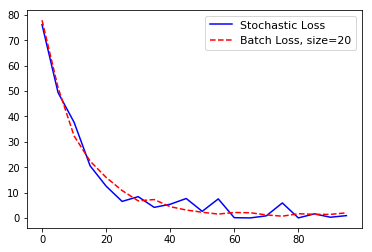

In [14]:
plt.plot(range(0, 100, 5), loss_stochastic, 'b-', label='Stochastic Loss')
plt.plot(range(0, 100, 5), loss_batch, 'r--', label='Batch Loss, size=20')
plt.legend(loc='upper right', prop={'size': 11})
plt.show()